In [1]:
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os
#pip install opencv-python  do this on terminal
#this is the guide I am following:
# https://codewords.recurse.com/issues/six/image-processing-101

In [2]:
# read an image

cwd = os.getcwd()
print(cwd)

img = cv2.imread('living_room.jpg')

# show image format (basically a 3-d array of pixel color info, in BGR format)
print(img)

/home/ubuntu/Notebooks
[[[182 177 179]
  [182 177 179]
  [182 177 179]
  ..., 
  [129 103  63]
  [125  98  61]
  [126 100  64]]

 [[182 177 179]
  [182 177 179]
  [182 177 179]
  ..., 
  [135 110  66]
  [134 110  68]
  [135 110  70]]

 [[182 177 179]
  [182 177 179]
  [182 177 179]
  ..., 
  [143 120  72]
  [138 115  69]
  [128 105  60]]

 ..., 
 [[ 35  94 174]
  [ 47  94 168]
  [ 66  98 163]
  ..., 
  [229 234 235]
  [230 235 236]
  [230 235 236]]

 [[ 64 118 189]
  [ 67 120 193]
  [ 67 118 191]
  ..., 
  [226 231 230]
  [225 230 229]
  [224 229 228]]

 [[ 59 112 185]
  [ 64 119 194]
  [ 56 110 187]
  ..., 
  [228 233 232]
  [227 232 231]
  [224 229 228]]]


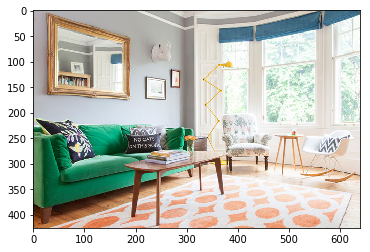

In [3]:
# convert image to RGB color for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show image with matplotlib
plt.imshow(img)
plt.show()

In [4]:
# convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# grayscale image represented as a 2-d array
print(gray_img)

[[178 178 178 ...,  94  90  92]
 [178 178 178 ..., 100 100 101]
 [178 178 178 ..., 108 104  94]
 ..., 
 [111 111 114 ..., 234 235 235]
 [133 136 134 ..., 230 229 228]
 [128 135 127 ..., 232 231 228]]


In [5]:
# find average per row, assuming image is already in the RGB format.
# np.average() takes in an axis argument which finds the average across that axis.
average_color_per_row = np.average(img, axis=0)

# find average across average per row
average_color = np.average(average_color_per_row, axis=0)

# convert back to uint8
average_color = np.uint8(average_color)
print(average_color)

[183 185 174]


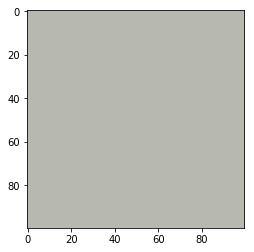

In [6]:
# create 100 x 100 pixel image with average color value
average_color_img = np.array([[average_color]*100]*100, np.uint8)

plt.imshow(average_color_img)
plt.show()

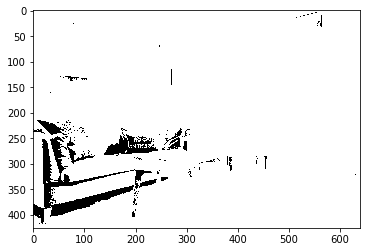

In [7]:

# threshold for image, with threshold 60
_, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)

# show image
threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)
plt.imshow(threshold_img)
plt.show()

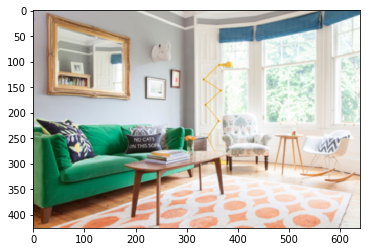

In [8]:
# gaussian blurring with a 5x5 kernel
img_blur_small = cv2.GaussianBlur(img, (5,5), 0)
plt.imshow(img_blur_small)
plt.show()

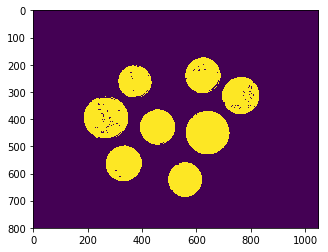

In [14]:
coins = cv2.imread('coins_orig.jpg')
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
coins_preprocessed = cv2.GaussianBlur(coins_gray, (5, 5), 0)

# get binary image
_, coins_binary = cv2.threshold(coins_preprocessed, 130, 255, cv2.THRESH_BINARY)

# invert image to get coins
coins_binary = cv2.bitwise_not(coins_binary)
plt.imshow(coins_binary)
plt.show()

In [16]:
# find contours
_, coins_contours, _ = cv2.findContours(coins_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# make copy of image
coins_and_contours = np.copy(coins)

# find contours of large enough area
min_coin_area = 60
large_contours = [cnt for cnt in coins_contours if cv2.contourArea(cnt) > min_coin_area]

# draw contours
cv2.drawContours(coins_and_contours, large_contours, -1, (255,0,0))

# print number of contours
print('number of coins: %d' % len(large_contours))

number of coins: 8
